In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv("/content/drive/MyDrive/nlp_data.csv")

In [ ]:
x.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,290.3,291.3,292.3,293.3,294.3,295.3,296.3,297.3,298.3,299.3
0,0,-2.134079,-0.821718,-1.506383,1.048583,3.920401,-0.584234,0.475946,2.259927,-1.201420,...,-0.747450,1.327223,-5.994067,2.160017,2.270767,0.106248,4.281367,-2.089467,2.741933,-1.516737
1,1,-0.914101,-0.871207,3.916614,1.688921,1.822252,-1.323222,3.647720,0.568394,-5.944631,...,0.248433,2.347017,-6.355200,0.032167,1.558867,1.801963,2.517733,-1.697350,0.011550,-1.442650
2,2,-0.780868,1.302017,0.528243,2.400689,2.740922,-0.119786,2.438258,0.632809,-4.650505,...,1.341145,3.170006,-7.006167,1.596183,1.197000,1.384523,2.344600,-2.525283,1.937123,-1.105753
3,3,-2.235881,1.264590,-2.077184,0.939273,2.927240,0.814982,0.313947,0.901103,-1.779206,...,0.794533,2.428450,-5.917624,0.736217,0.872700,1.275228,2.453583,-1.737200,0.785048,-0.661407
4,4,-1.222427,-0.241798,0.102243,0.167193,3.135214,-0.464686,1.315902,1.592722,-1.441536,...,-0.058805,2.518033,-6.305040,1.173100,1.509917,1.314182,4.630967,-1.161525,2.297460,-1.221800


In [ ]:
x = x.drop('Unnamed: 0',axis=1)

In [ ]:
import joblib

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.0 MB/s eta 0:00:00


In [ ]:
x.shape

(300000, 1200)

In [ ]:
classifier = joblib.load('/content/drive/MyDrive/xgboost_model.joblib')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/behaviour_simulation_train.csv", encoding='latin-1')

In [ ]:
y = []
for i in dataset['likes']:
  if i <= 100:
    y.append(0)
  elif i <= 1000:
    y.append(1)
  elif i <= 5000:
    y.append(2)
  elif i <= 10000:
    y.append(3)
  elif i <= 100000:
    y.append(4)
  else:
    y.append(5)

In [ ]:
y_pred = classifier.predict(x)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y,y_pred))
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

0.9745166666666667
[[160552   3948     63      3      1      0]
 [  2183  94811   1117     28     21      0]
 [     9    114  29118     84     54      1]
 [     0      0      0   4140     14      0]
 [     0      0      0      4   3637      1]
 [     0      0      0      0      0     97]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    164567
           1       0.96      0.97      0.96     98160
           2       0.96      0.99      0.98     29380
           3       0.97      1.00      0.98      4154
           4       0.98      1.00      0.99      3642
           5       0.98      1.00      0.99        97

    accuracy                           0.97    300000
   macro avg       0.97      0.99      0.98    300000
weighted avg       0.97      0.97      0.97    300000



In [ ]:
print(y_pred[1], y[1])

2 2


In [ ]:
print(dataset.iloc[1, :].values)

[2 '2018-06-30 10:04:20' 2750
 'Watch rapper <mention> freestyle for over an HOUR <hyperlink> <hyperlink>'
 'IndyMusic'
 "[Photo(previewUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/Dg7mW-VX0AE_hMn?format=jpg&name=large')]"
 'independent']


In [ ]:
import seaborn as sns

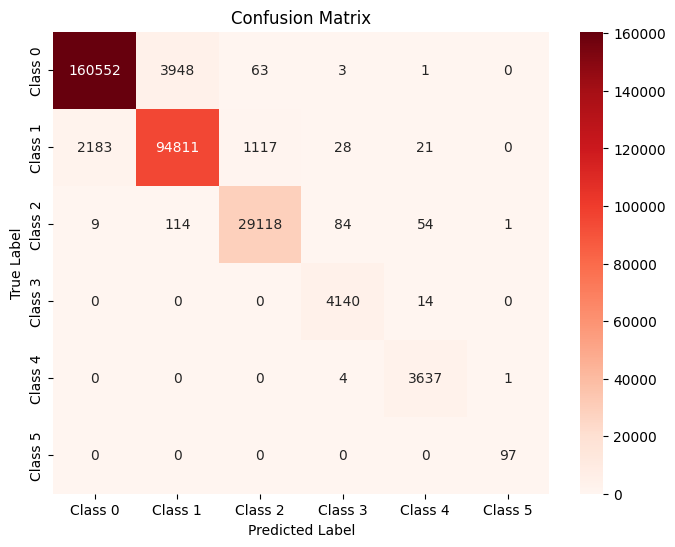

<Figure size 640x480 with 0 Axes>

In [ ]:
cm = confusion_matrix(y, y_pred)

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion_matrix.jpg")